In [96]:
from functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
### Note: There is a minor error in functions.py. (about the number of article limit for Bing) I'll fix it ASAP and remove this note

In [100]:
np.arange(0, 1, step=0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [68]:
e = pd.read_excel("numbers_and_dates.xlsx")
e

,Query,Engine,results,dates,days
0,Vessel caught misreporting catch amount,Google,20,"['2 weeks ago', 'Oct 31, 2023', '1 month ago',...","[14, 234, 30, 331, 88, 282, 69, 886, 984, 1047..."
1,Vessel caught misreporting catch amount,Bing,14,"['13d', '12d', '12d', '13d', '8d', '12d', '8d'...","[13, 12, 12, 13, 8, 12, 8, 12, 13, 8, 12, 12, ..."
2,Vessel caught falsifying fishing logs,Google,20,"['Mar 20, 2024', 'Oct 4, 2023', 'Feb 22, 2024'...","[93, 261, 120, 268, 7, 295, 192, 207, 294, 309..."
3,Vessel caught falsifying fishing logs,Bing,14,"['18d', '12d', '2d', '24d', '2mon', '3d', '1mo...","[18, 12, 2, 24, 1, 3, 1, 15, 1, 1, 15, 15, 15, 5]"
4,Vessel caught with incorrect catch reports,Google,20,"['3 days ago', 'Mar 23, 2024', 'Oct 9, 2023', ...","[3, 90, 256, 171, 227, 241, 331, 351, 288, 288..."
5,Vessel caught with incorrect catch reports,Bing,12,"['2d', '2d', '12d', '3d', '5d', '8d', '3d', '1...","[2, 2, 12, 3, 5, 8, 3, 12, 12, 12, 12, 12]"
6,Vessel caught underreporting catch in North At...,Google,14,"['May 24, 2023', 'Sep 26, 2022', 'Jan 19, 2016...","[394, 634, 3076, 408, 3075, 3791, 463, 2481, 1..."
7,Vessel caught underreporting catch in North At...,Bing,11,"['8h', '1mon', '3d', '12d', '9d', '8d', '22d',...","[1, 1, 3, 12, 9, 8, 22, 15, 3, 12, 12]"
8,Vessel caught misreporting haddock catch,Google,2,"['Oct 9, 2020', 'Sep 28, 2022']","[1351, 632]"
9,Vessel caught misreporting haddock catch,Bing,14,"['1mon', '3d', '23d', '4mon', '2mon', '4y', '7...","[1, 3, 23, 1, 1, 120, 1, 15, 420, 3, 1, 210, 3..."


In [87]:
#queries= ['Vessel caught misreporting catch amount', 'Vessel caught falsifying fishing logs', 'Vessel caught with incorrect catch reports',
    #'Vessel caught underreporting catch in North Atlantic', 'Vessel caught misreporting haddock catch', 
     #'Vessel caught with inaccurate fish size records', 'Vessel caught underreporting catch near protected area',
    #'Vessel caught misreporting tuna catch quantities', 'Vessel caught with unrecorded fish species', 
    #'Vessel caught bypassing quota system']

In [85]:
article_counts = e.groupby(['Query', 'Engine', 'results']).size().reset_index(name='Article Count')
ac = article_counts.drop(['Article Count'], axis=1)
ac

,Query,Engine,results
0,Vessel caught bypassing quota system,Bing,14
1,Vessel caught bypassing quota system,Google,5
2,Vessel caught bypassing quota system,Yahoo,0
3,Vessel caught falsifying fishing logs,Bing,14
4,Vessel caught falsifying fishing logs,Google,20
5,Vessel caught falsifying fishing logs,Yahoo,0
6,Vessel caught misreporting catch amount,Bing,14
7,Vessel caught misreporting catch amount,Google,20
8,Vessel caught misreporting catch amount,Yahoo,0
9,Vessel caught misreporting haddock catch,Bing,14


In [95]:
# just in case to know what happen
Q_1 = ac['Query'].iloc[0]
Q_2 = ac['Query'].iloc[3]
Q_3 = ac['Query'].iloc[6]
Q_4 = ac['Query'].iloc[9]
Q_5 = ac['Query'].iloc[12]
Q_6 = ac['Query'].iloc[15]
Q_7 = ac['Query'].iloc[18]
Q_8 = ac['Query'].iloc[21]
Q_9 = ac['Query'].iloc[24]
Q_10 = ac['Query'].iloc[27]

# create the list of queries
queries_list = [ac['Query'].iloc[i] for i in range(0, 28, 3)]
# checking
# print(queries_list)

### 'Number of Articles per Query and Engine'

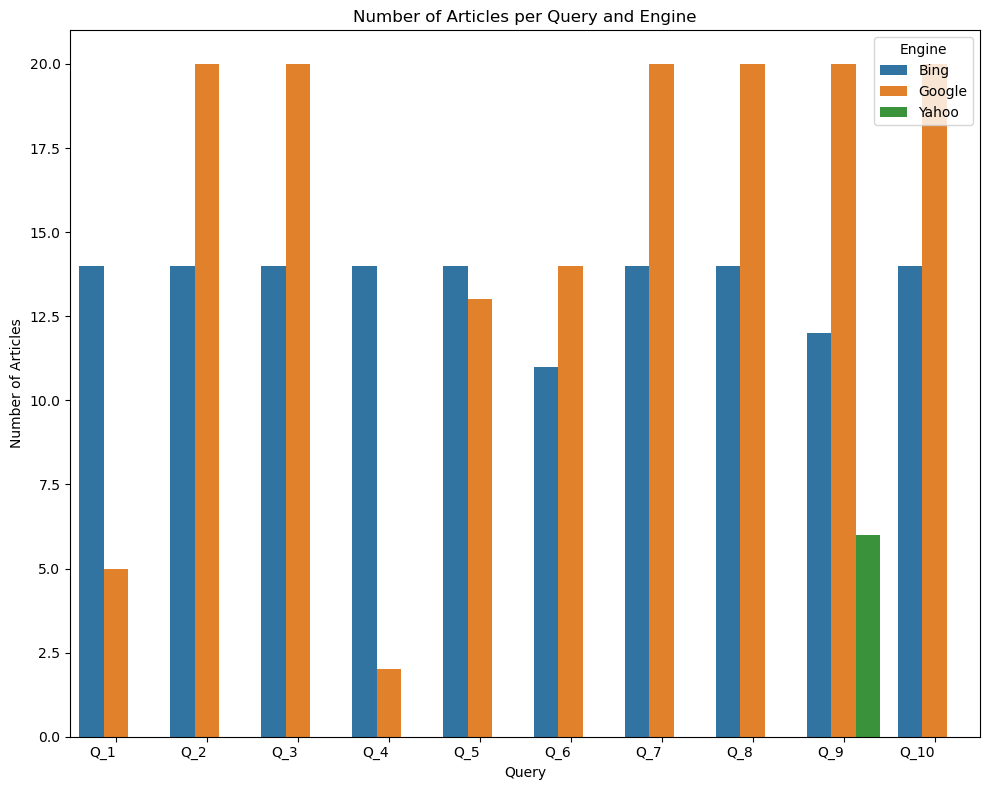

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grouping and resetting index
article_counts = e.groupby(['Query', 'Engine', 'results']).size().reset_index(name='Article Count')

# Dropping the 'Article Count' column
ac = article_counts.drop(['Article Count'], axis=1)

# Extracting every third query from the 'Query' column
queries_list = [ ac['Query'].iloc[i] for i in range(0, len(ac['Query']), 3)]

queries_labels = [f'Q_{i}' for i in range(1, 11)]

# Filtering the DataFrame to only include the queries in queries_list
filtered_ac = ac[ac['Query'].isin(queries_list)]

#color = ['lightblue', 'lightpurple', 'lightgreen']
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Query', y='results', hue='Engine', data=filtered_ac )
plt.title('Number of Articles per Query and Engine')

# Set xticks with query names
plt.xticks(ticks=range(len(queries_labels)), labels=queries_labels, rotation=0, ha='right')
plt.xlabel('Query')
plt.ylabel('Number of Articles')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [115]:
article_counts1 = e.groupby(['Query', 'Engine', 'days']).size().reset_index(name='Article Count')
ac1 = article_counts1.drop(['Article Count'], axis=1)
ac1

,Query,Engine,days
0,Vessel caught bypassing quota system,Bing,"[60, 2, 60, 8, 6, 15, 12, 9, 7, 1, 15, 23, 12, 3]"
1,Vessel caught bypassing quota system,Google,"[14, 340, 2965, 5122, 1676]"
2,Vessel caught bypassing quota system,Yahoo,[]
3,Vessel caught falsifying fishing logs,Bing,"[18, 12, 2, 24, 1, 3, 1, 15, 1, 1, 15, 15, 15, 5]"
4,Vessel caught falsifying fishing logs,Google,"[93, 261, 120, 268, 7, 295, 192, 207, 294, 309..."
5,Vessel caught falsifying fishing logs,Yahoo,[]
6,Vessel caught misreporting catch amount,Bing,"[13, 12, 12, 13, 8, 12, 8, 12, 13, 8, 12, 12, ..."
7,Vessel caught misreporting catch amount,Google,"[14, 234, 30, 331, 88, 282, 69, 886, 984, 1047..."
8,Vessel caught misreporting catch amount,Yahoo,[]
9,Vessel caught misreporting haddock catch,Bing,"[1, 3, 23, 1, 1, 120, 1, 15, 420, 3, 1, 210, 3..."


In [134]:
type(ac1["days"].iloc[0])
type(eval(ac1["days"].iloc[0]))
len(eval(ac1["days"].iloc[0]))

14

### Calculate the Variances:

In [188]:


# Sample DataFrame creation (replace this with your actual DataFrame)
# ac1 = pd.DataFrame({
#     "days": ['[60, 2, 60, 8, 6, 15, 12, 9, 7, 1, 15, 23, 12, 3]', '[10, 20, 30, 40, 50]']
# })

# Initialize an empty list to store variances
variances = []

# Loop through each row in the DataFrame
for i in range(len(ac1)):
    # Extract the list from the string
    days_list = eval(ac1["days"].iloc[i])
    if days_list == []:
        variance = 0
    else:
    # Calculate the standard deviation of the list
        variance = np.std(days_list)
    # Append the variance to the list
    variances.append(variance)

# Assign the list of variances to the "Variance" column in the DataFrame
ac1["Variance"] = variances

# Print the DataFrame to verify
print(ac1)


                                                Query  ...     Variance
0                Vessel caught bypassing quota system  ...    18.580355
1                Vessel caught bypassing quota system  ...  1869.767002
2                Vessel caught bypassing quota system  ...     0.000000
3               Vessel caught falsifying fishing logs  ...     7.633171
4               Vessel caught falsifying fishing logs  ...   318.686758
5               Vessel caught falsifying fishing logs  ...     0.000000
6             Vessel caught misreporting catch amount  ...     1.840586
7             Vessel caught misreporting catch amount  ...   641.870335
8             Vessel caught misreporting catch amount  ...     0.000000
9            Vessel caught misreporting haddock catch  ...   115.687651
10           Vessel caught misreporting haddock catch  ...   359.500000
11           Vessel caught misreporting haddock catch  ...     0.000000
12   Vessel caught misreporting tuna catch quantities  ...    47

In [220]:
type(variances)

list

In [189]:
ac1["Variance"]

0       18.580355
1     1869.767002
2        0.000000
3        7.633171
4      318.686758
5        0.000000
6        1.840586
7      641.870335
8        0.000000
9      115.687651
10     359.500000
11       0.000000
12      47.306912
13    1336.596278
14       0.000000
15       6.273386
16    1379.620119
17       0.000000
18       8.209005
19    1217.536862
20       0.000000
21      49.937359
22    1266.872380
23       0.000000
24       4.348531
25     526.767748
26     226.858069
27      21.514708
28     594.907428
29       0.000000
Name: Variance, dtype: float64

### Google Variance

<Figure size 1000x700 with 0 Axes>

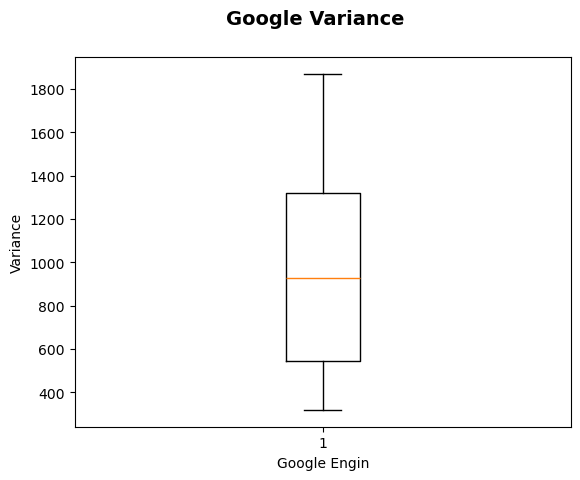

In [245]:
# "MnG = ", mng , 
meang=[]
for i in range(len(ac1)):
    if ac1["Engine"].iloc[i] == 'Google':
        meang.append(ac1["Variance"].iloc[i])
    #for j in range(len(meang)):
        #mng = meang[j].sum()
        #mng = mng/len(meang)
#print("MeanG = ", meang)

fig = plt.figure(figsize =(10, 7))
# figure related code
fig = plt.figure()
fig.suptitle('Google Variance', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(meang)

#ax.set_title('axes title')
ax.set_xlabel('Google Engin')
ax.set_ylabel('Variance')

plt.show();

In [244]:
type(meang)

list

### Yahoo Variance

<Figure size 1000x700 with 0 Axes>

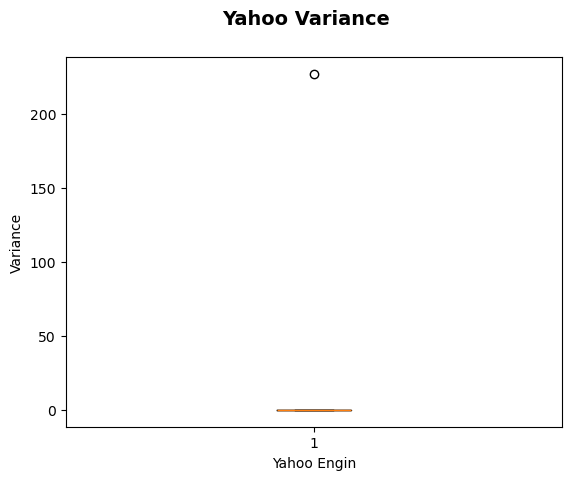

In [246]:
# "MnY = ", mny,
meany=[]
for i in range(len(ac1)):
    if ac1["Engine"].iloc[i] == 'Yahoo':
        meany.append(ac1["Variance"].iloc[i])
    #for j in range(len(meany)):
        #mny = meany[j].sum()
        #mny = mny/len(meany)
#print(  "MeanY = ", meany )


fig = plt.figure(figsize =(10, 7))
# figure related code
fig = plt.figure()
fig.suptitle('Yahoo Variance', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(meany)

#ax.set_title('axes title')
ax.set_xlabel('Yahoo Engin')
ax.set_ylabel('Variance')

plt.show();

### Bing Variance

<Figure size 1000x700 with 0 Axes>

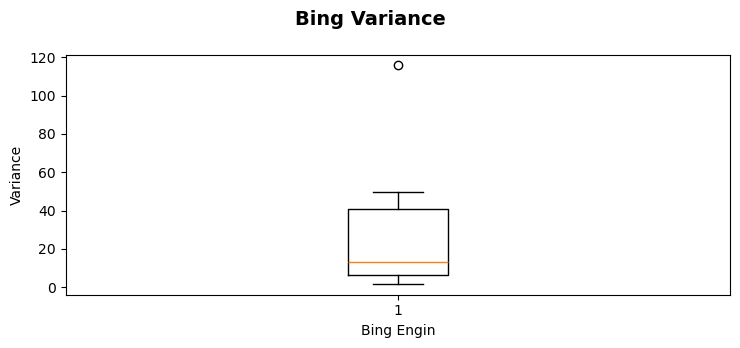

In [257]:
# "MnB = ", mnb, 
meanb=[]
for i in range(len(ac1)):
    if ac1["Engine"].iloc[i] == 'Bing':
        meanb.append(ac1["Variance"].iloc[i])
    #for j in range(len(meanb)):
        #mnb = meanb[j].sum()
        #mnb = mnb/len(meanb)
#print( "MeanB = ", meanb)



fig = plt.figure(figsize =(10, 7))
# figure related code
fig = plt.figure()
fig.suptitle('Bing Variance', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(meanb)

#ax.set_title('axes title')
ax.set_xlabel('Bing Engin')
ax.set_ylabel('Variance')

plt.show();

In [ ]:
### All

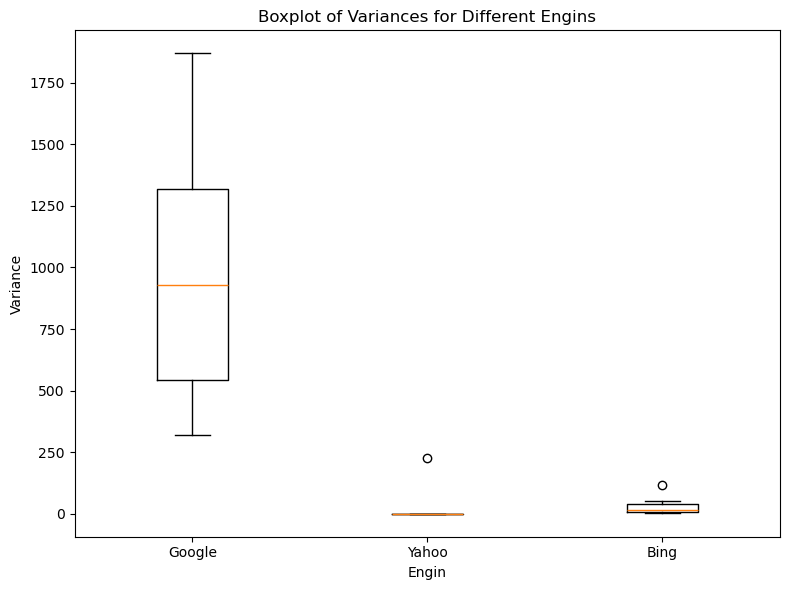

In [269]:


# Combine the lists into a single list for plotting
data = [meang, meany, meanb]

# Labels for the boxplots
labels = ['Google', 'Yahoo', 'Bing']

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title('Boxplot of Variances for Different Engins')
plt.xlabel('Engin')
plt.ylabel('Variance')
# Show the plot
plt.show()



### Variances of per Query and Engine

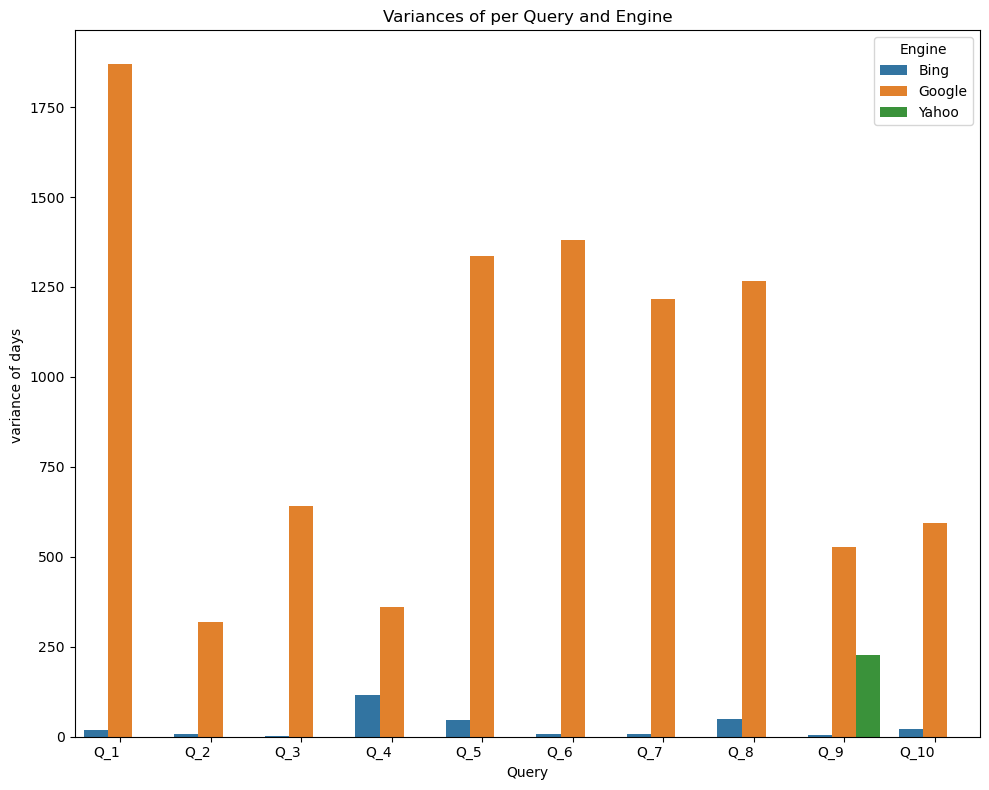

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grouping and resetting index
#article_counts = e.groupby(['Query', 'Engine', 'results']).size().reset_index(name='Article Count')

# Dropping the 'Article Count' column
# ac = article_counts.drop(['Article Count'], axis=1)

# Extracting every third query from the 'Query' column
queries_list = [ ac1['Query'].iloc[i] for i in range(0, len(ac1['Query']), 3)]

queries_labels = [f'Q_{i}' for i in range(1, 11)]


# Filtering the DataFrame to only include the queries in queries_list
filtered_ac = ac1[ac1['Query'].isin(queries_list)]

#color = ['lightblue', 'lightpurple', 'lightgreen']
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Query', y='Variance', hue='Engine', data=filtered_ac )
plt.title('Variances of per Query and Engine')

# Set xticks with query names
plt.xticks(ticks=range(len(queries_labels)), labels=queries_labels, rotation=0, ha='right')
plt.xlabel('Query')
plt.ylabel('variance of days ')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


### Variances of per Query and Engine by boxplot

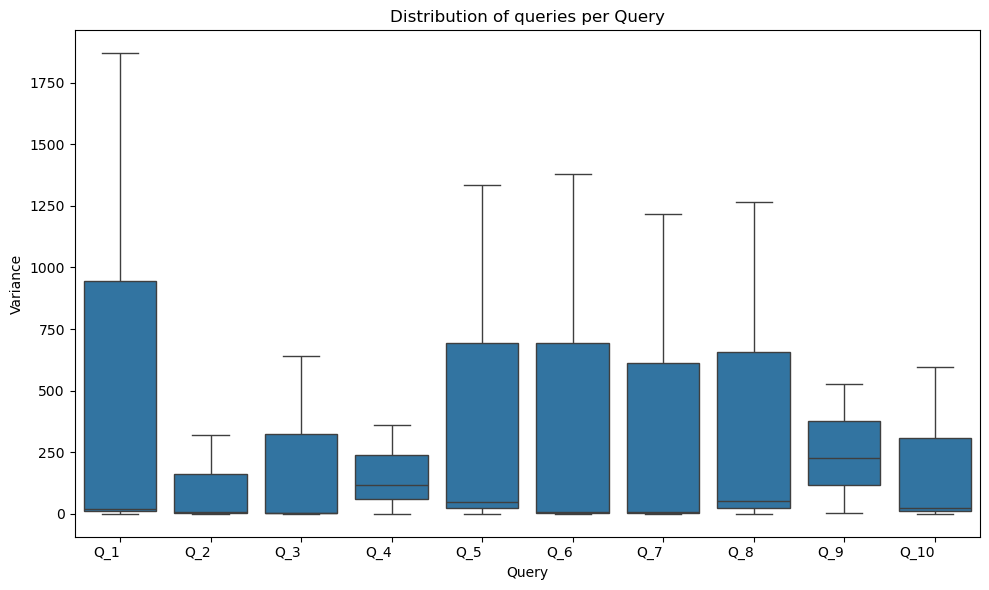

In [224]:
# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Query', y='Variance', data=ac1)
plt.title('Distribution of queries per Query')
plt.xticks(ticks=range(len(queries_labels)), labels=queries_labels, rotation=45, ha='right') # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Variance')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()